In [138]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [148]:
def plot_graph(path, model):
    ppr_k = 30
    m = 7
    d = os.path.abspath(path+"/task2")
    output_dir = os.path.join("outputs", "task2/plots")
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    tf_list, tfidf_list = [], []
    files = os.listdir(d)
    if model=="dominant":
        name = "PPR"
        for i in [2, 3, 4, 5, 6, 7]:
            f_tf = os.path.join(d, "{}_{}_".format(ppr_k, m)+model+"_1_{}.txt".format(i))
            data_tf = json.load(open(f_tf, "r"))
            acc = data_tf['acc']
            a = acc['voting'] if acc['voting']>acc['wt_scores'] else acc['wt_scores']
            tf_list.append(np.round(a, decimals=2))
            
            f_idf = os.path.join(d, "{}_{}_".format(ppr_k, m)+model+"_2_{}.txt".format(i))
            data_idf = json.load(open(f_idf, "r"))
            acc = data_idf['acc']
            a = acc['voting'] if acc['voting']>acc['wt_scores'] else acc['wt_scores']
            tfidf_list.append(np.round(a, decimals=2))
        labels = ['PCA', 'SVD', 'NMF', 'LDA', 'Edit-Distance', 'DTW-Distance']
    else:
        name = model
        l = [i for i in files if model in i]
        for i in [1,2 ,3, 4]:
            f_tf = os.path.join(d, model+"_1_{}.txt".format(i))
            data_tf = json.load(open(f_tf, "r"))
            tf_list.append(np.round(data_tf['Accuracy'], decimals=2))
            f_idf = os.path.join(d, model+"_2_{}.txt".format(i))
            data_idf = json.load(open(f_idf, "r"))
            tfidf_list.append(np.round(data_idf['Accuracy'], decimals=2))
        labels = ['PCA', 'SVD', 'NMF', 'LDA']    
    
    x = np.arange(len(labels))  
    width = 0.35  

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, tf_list, width, label='TF')
    rects2 = ax.bar(x + width/2, tfidf_list, width, label='TF-IDF')

    ax.set_ylabel('Accuracy')
    ax.set_title('Model')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()
    fig.savefig(os.path.join(output_dir, name+".png"))
    



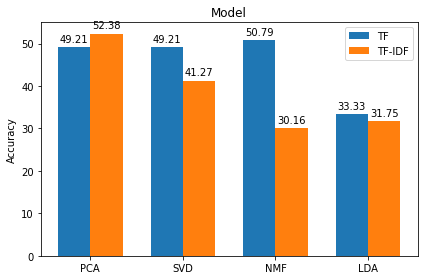

In [149]:
plot_graph("outputs", "knn")